## Importing logs

In [149]:
import matplotlib.pyplot as plt
import pickle

In [148]:
# proc_logs = {}

In [141]:
CLOCK_SPEED = '561-param' # CHANGE THIS EVERYTIME

In [142]:
proc_logs[CLOCK_SPEED] = []
for i in range(3):
    infile = "../data/process" + str(i) + ".log"
    with open(infile) as f:
        f = f.readlines()
        proc_logs[CLOCK_SPEED].append(f)

In [154]:
with open('logs.pkl', 'wb') as file:
    pickle.dump(proc_logs, file)
    
# If we want to load data from saved pkl file:
# proc_logs = pickle.load(open("logs.pkl", "rb"))

## Analyzing message type breakdown

In [144]:
for k in proc_logs.keys():
    print(k)
    for i in range(3):
        proc_info = proc_logs[k][i]
        total = len(proc_info)
        combined_str = ''.join(proc_info)
        internal = str(round(combined_str.count('internal')/total*100, 1))
        receive = str(round(combined_str.count('received')/total*100, 1))
        send = str(round(combined_str.count('sending')/total*100, 1))
        print('Process '+str(i)+': '+'Internal: '+internal+', '+'Receive: '+receive+', '+'Send: '+send)
    print()

216
Process 0: Internal: 28.9, Receive: 53.1, Send: 18.0
Process 1: Internal: 1.6, Receive: 98.4, Send: 0.0
Process 2: Internal: 69.3, Receive: 3.4, Send: 27.3

125-param
Process 0: Internal: 0.0, Receive: 99.0, Send: 1.0
Process 1: Internal: 40.9, Receive: 47.7, Send: 11.4
Process 2: Internal: 63.5, Receive: 4.0, Send: 32.5

611-param
Process 0: Internal: 19.8, Receive: 0.2, Send: 80.0
Process 1: Internal: 0.0, Receive: 100.0, Send: 0.0
Process 2: Internal: 0.0, Receive: 98.8, Send: 1.2

145-param
Process 0: Internal: 0.0, Receive: 100.0, Send: 0.0
Process 1: Internal: 5.3, Receive: 74.3, Send: 20.4
Process 2: Internal: 17.2, Receive: 14.1, Send: 68.7

445
Process 0: Internal: 45.8, Receive: 29.9, Send: 24.3
Process 1: Internal: 47.0, Receive: 38.6, Send: 14.3
Process 2: Internal: 53.0, Receive: 21.7, Send: 25.2

561-param
Process 0: Internal: 0.9, Receive: 84.7, Send: 14.5
Process 1: Internal: 8.2, Receive: 10.8, Send: 81.0
Process 2: Internal: 0.0, Receive: 98.6, Send: 1.4



## Plotting message queue length frequenices

key: 216


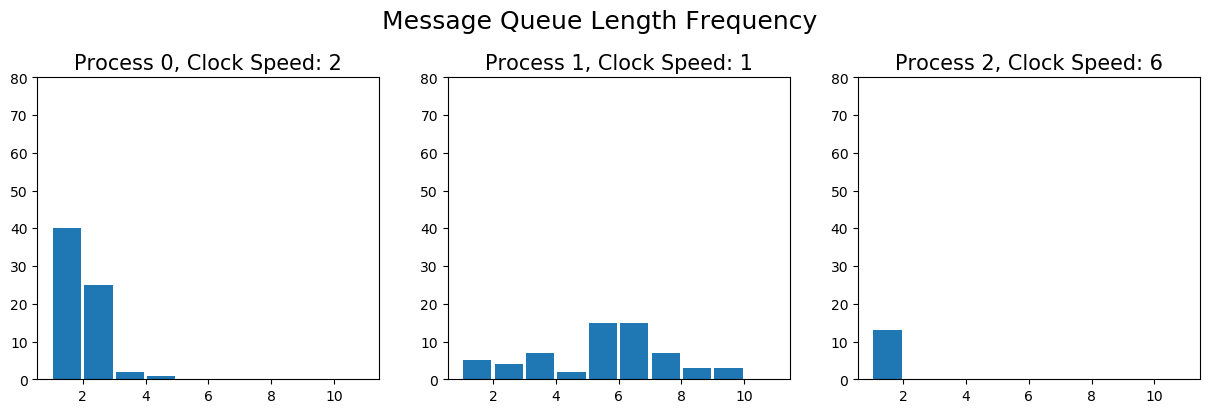


key: 125-param


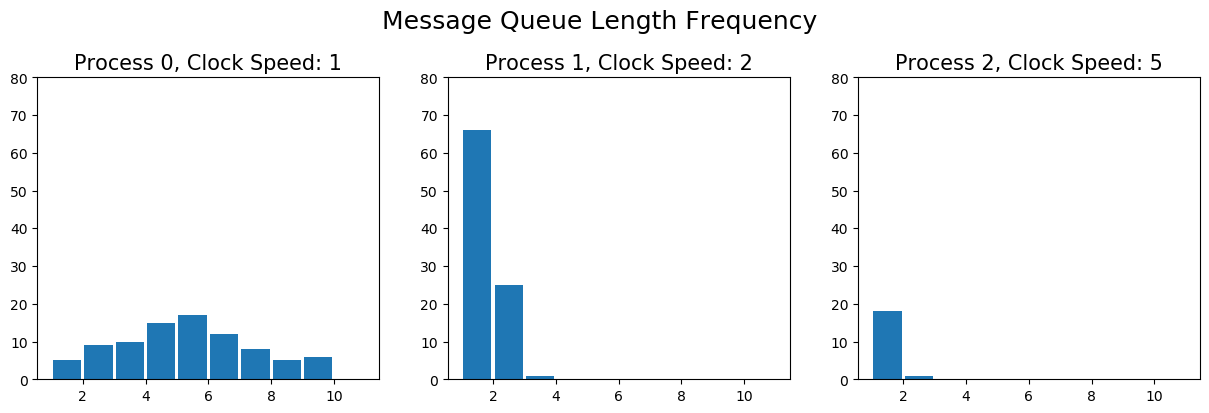


key: 611-param


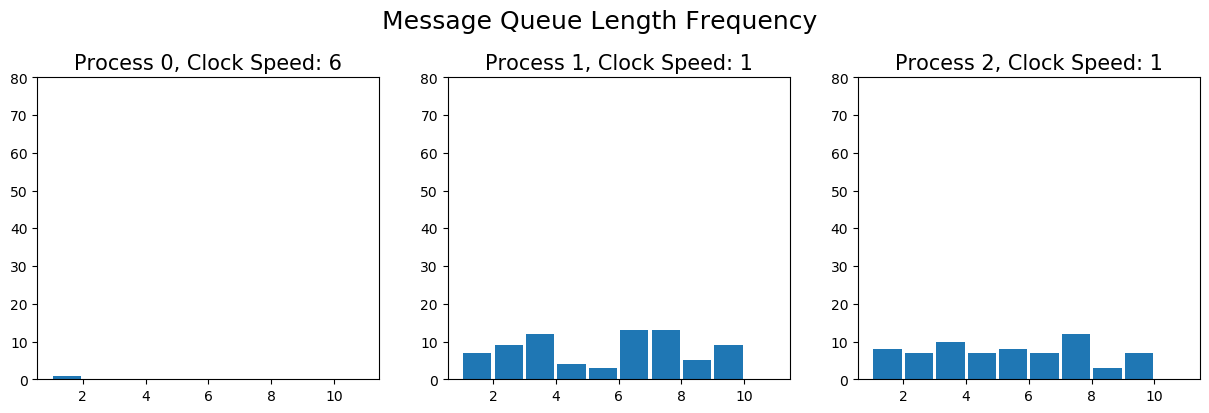


key: 145-param


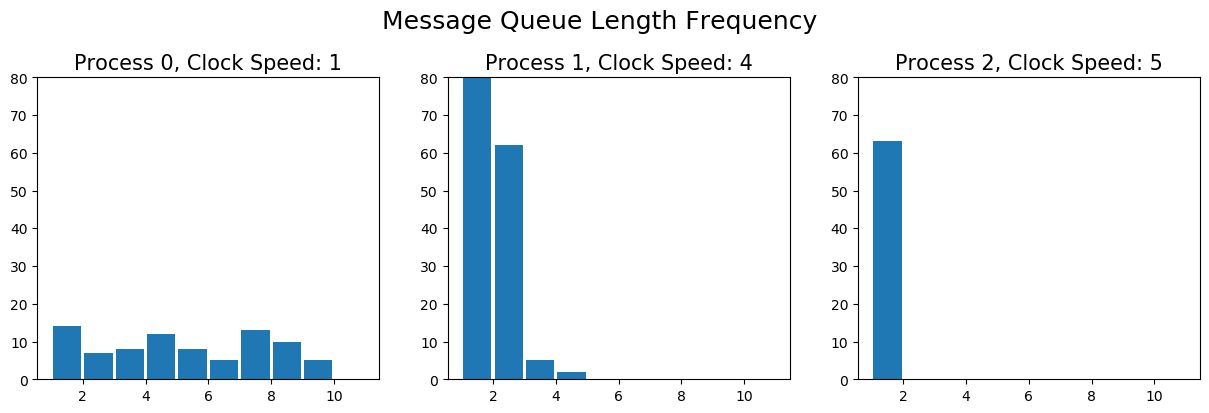


key: 445


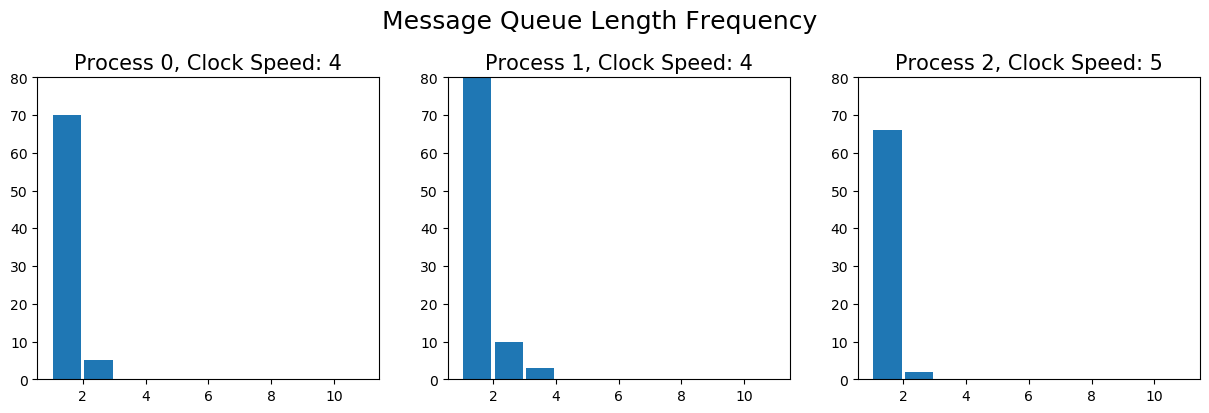


key: 561-param


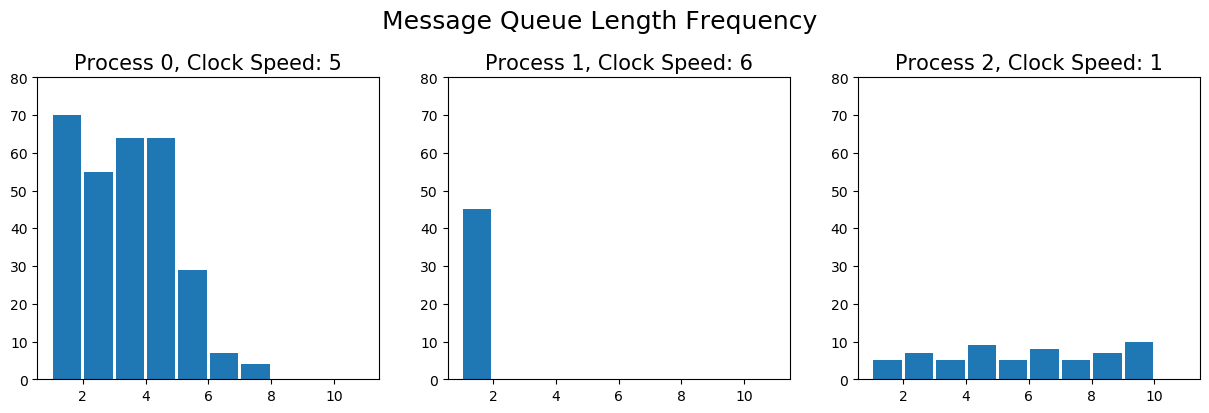

In [158]:
for k in proc_logs.keys():
    print("key:", k)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), dpi = 100)
    for i in range(3):
        proc_info = proc_logs[k][i]
        hist_info = []
        for m in proc_info:
            if 'message queue' in m:
                hist_info.append(int(m[-2]))
        ax[i].hist(hist_info, bins=range(1,12),rwidth=0.9)
        ax[i].set_ylim([0, 80])
        ax[i].set_title('Process '+str(i)+', Clock Speed: '+str(k[i]), fontsize = 15)

    fig.suptitle('Message Queue Length Frequency', fontsize = 18, y=1.05)
    plt.show()
    print()


## Analyzing logical clock value differences

In [159]:
for k in proc_logs.keys():
    print("key:", k)
    for i in range(3):
        proc_info = proc_logs[k][i]
        for m in proc_info:
            

key: 216
key: 125-param
key: 611-param
key: 145-param
key: 445
key: 561-param


In [162]:
len('1678209663678')

13

In [178]:
# Graph logical time vs. system time 

start_time = int(proc_info[0][0:13])
sys = []
logical = []
for m in proc_info:
    sys_time = int(m[0:13])
    elapsed = sys_time - start_time # in milliseconds
    logical_clock_value = int(m.split(',')[1])
    
    sys.append(elapsed/1000)
    logical.append(logical_clock_value)

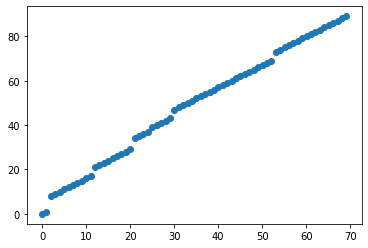

In [179]:
plt.scatter(sys, logical)
plt.show()

In [160]:
proc_info[0]

['1678209663678,0,2: sending to both processes\n',
 '1678209664679,1,2: received logical clock 6 from process 0, message queue length 5\n',
 '1678209665679,8,2: received logical clock 2 from process 1, message queue length 9\n',
 '1678209666680,9,2: received logical clock 3 from process 1, message queue length 11\n',
 '1678209667682,10,2: received logical clock 4 from process 1, message queue length 16\n',
 '1678209668682,11,2: received logical clock 5 from process 1, message queue length 19\n',
 '1678209669683,12,2: received logical clock 7 from process 0, message queue length 23\n',
 '1678209670684,13,2: received logical clock 8 from process 0, message queue length 27\n',
 '1678209671685,14,2: received logical clock 9 from process 0, message queue length 32\n',
 '1678209672686,15,2: received logical clock 10 from process 0, message queue length 37\n',
 '1678209673687,16,2: received logical clock 11 from process 0, message queue length 42\n',
 '1678209674688,17,2: received logical clo